In [10]:
from google.colab import files
uploaded = files.upload()

Saving Aramco.csv to Aramco.csv


In [11]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Aramco.csv']))

In [30]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import sklearn
X = sklearn.preprocessing.StandardScaler().fit_transform(X)
from sklearn.metrics import r2_score
import sys

In [25]:
data = df2.drop('Date', axis=1)

In [28]:
def r2_score(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return r2

In [31]:
print(sys.getrecursionlimit())
sys.setrecursionlimit(1500)


1000


In [12]:
# Load the data
data = df2
X = data[['Open', 'High', 'Low', 'Close', 'adj_close', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the SVM model
svm = SVR(kernel='rbf', C=1000, gamma=0.1)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2621.1514357196593


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared score: -0.5608663481561984


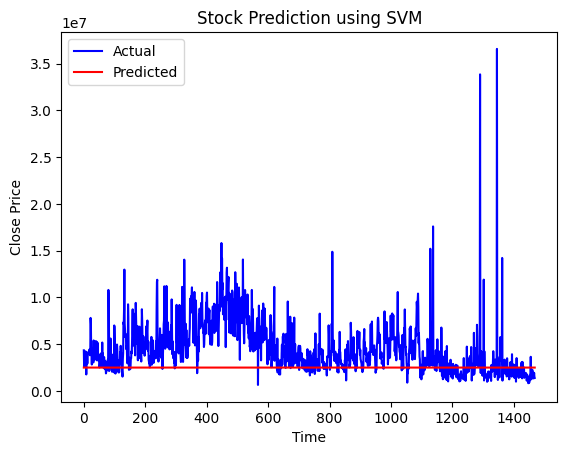

In [33]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data.iloc[:, :-1])
y_train = train_data.iloc[:, -1:]
X_test = scaler.transform(test_data.iloc[:, :-1])
y_test = test_data.iloc[:, -1:]

# Train the SVM model
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the R-squared score
score = r2_score(y_test, y_pred)
print('R-squared score:', score)

# Plot the actual and predicted values on a graph
plt.plot(y_test.values, color='blue', label='Actual')
plt.plot(y_pred, color='red', label='Predicted')
plt.title('Stock Prediction using SVM')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()